<h2>Data Analytics- notebook, example with used car data</h2>

**NOTE:** All AI usage rules etc. apply to data analytics notebooks too. Always mention if generative AI has been used, and how you can be sure the solution is correct!

<h4><b>Dataset name / short description:</b></h4>

Used car sales data

<h4><b>Data source (url):</b></h4>

<a href="https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv">https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv</a>

<h4><b>Data format:</b></h4>

single csv-file

<h4><b>Data description, features and limitations:</b></h4>

Used car sales data collected from cardekho.com. 261 cars in the dataset.
Includes data about the car name, manufacturing year, selling price, exshowroom price, kilometers driven, fuel type, seller type, transmission and
number of previous owners.

The dataset has only 261 cars, which limits the amount of correlations and
features in the data.


<h3><b>Code: importing modules, custom functions and loading the data</b></h3>

In [1]:
# importing the usual data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# load the data
cars = pd.read_csv("car data.csv")

<h3><b>Code: Data clean-up procedure</b></h3>

The ex-showroom price means the actual price a customer has to pay in order
to get the vehicle in the road legally. This means taxes, registration and other
fees exclusive to US. 

For reference, check:
https://www.acko.com/auto/difference-between-ex-showroom-price-and-onroad-price/


In [2]:
# our helper function to create the price difference
# between selling price and present price (ex-showroom price)
def percentage_difference(row):
    selling = row['Selling_Price']
    road = row['Present_Price']

    # the difference in decimal format
    result = 1 - round(selling / road, 2)
    return result


# name is not needed here (too unique to have any statistical meaning)
cars = cars.drop('Car_Name', axis=1)

# since the selling price and present price have a strong correlation,
# let's use our helper function to make the price difference column!
cars['Price_Difference'] = cars.apply(percentage_difference, axis=1)
 
# let's reorder the columns for easier reading in the data viewer
column_names = ['Year', 'Selling_Price', 'Present_Price', 'Price_Difference', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
cars = cars.reindex(columns=column_names)

# the owner column seems to be pretty uninteresting in this dataset
# most values are just 0 => not enough variance 
cars = cars.drop('Owner', axis=1)

<h3><b>Code: Data analysis</b></h3>

<Axes: >

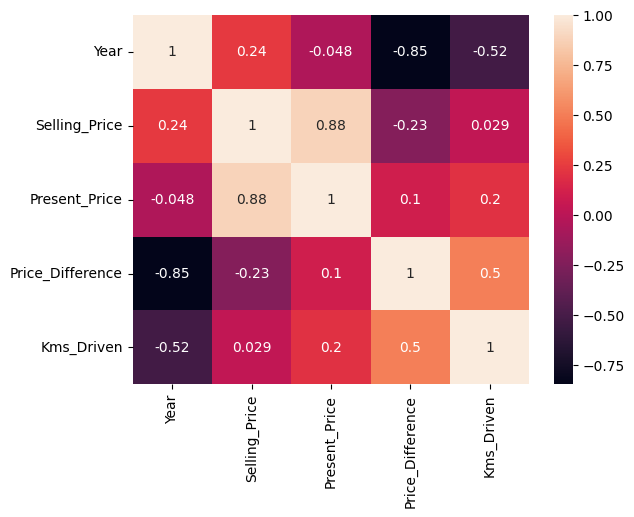

In [3]:
# a test sub dataset to see which cars are Diesel
# this approach is not very good for large datasets
automatic_diesels = cars[cars['Fuel_Type'] == 'Diesel']

# the amount of extra costs (price difference) is affected by car year and kms driven
correlations = cars.corr(numeric_only=True)

# plot correlation matrix
sns.heatmap(correlations, annot=True)

# The price difference has a very strong negative correlation to manufacture
# year and a strong correlation with kilometers driven. Basically this means, old
# cars with lots of driven kilometers, cost more to take into use (Present_Price is
# much bigger in relation to Selling_Price).

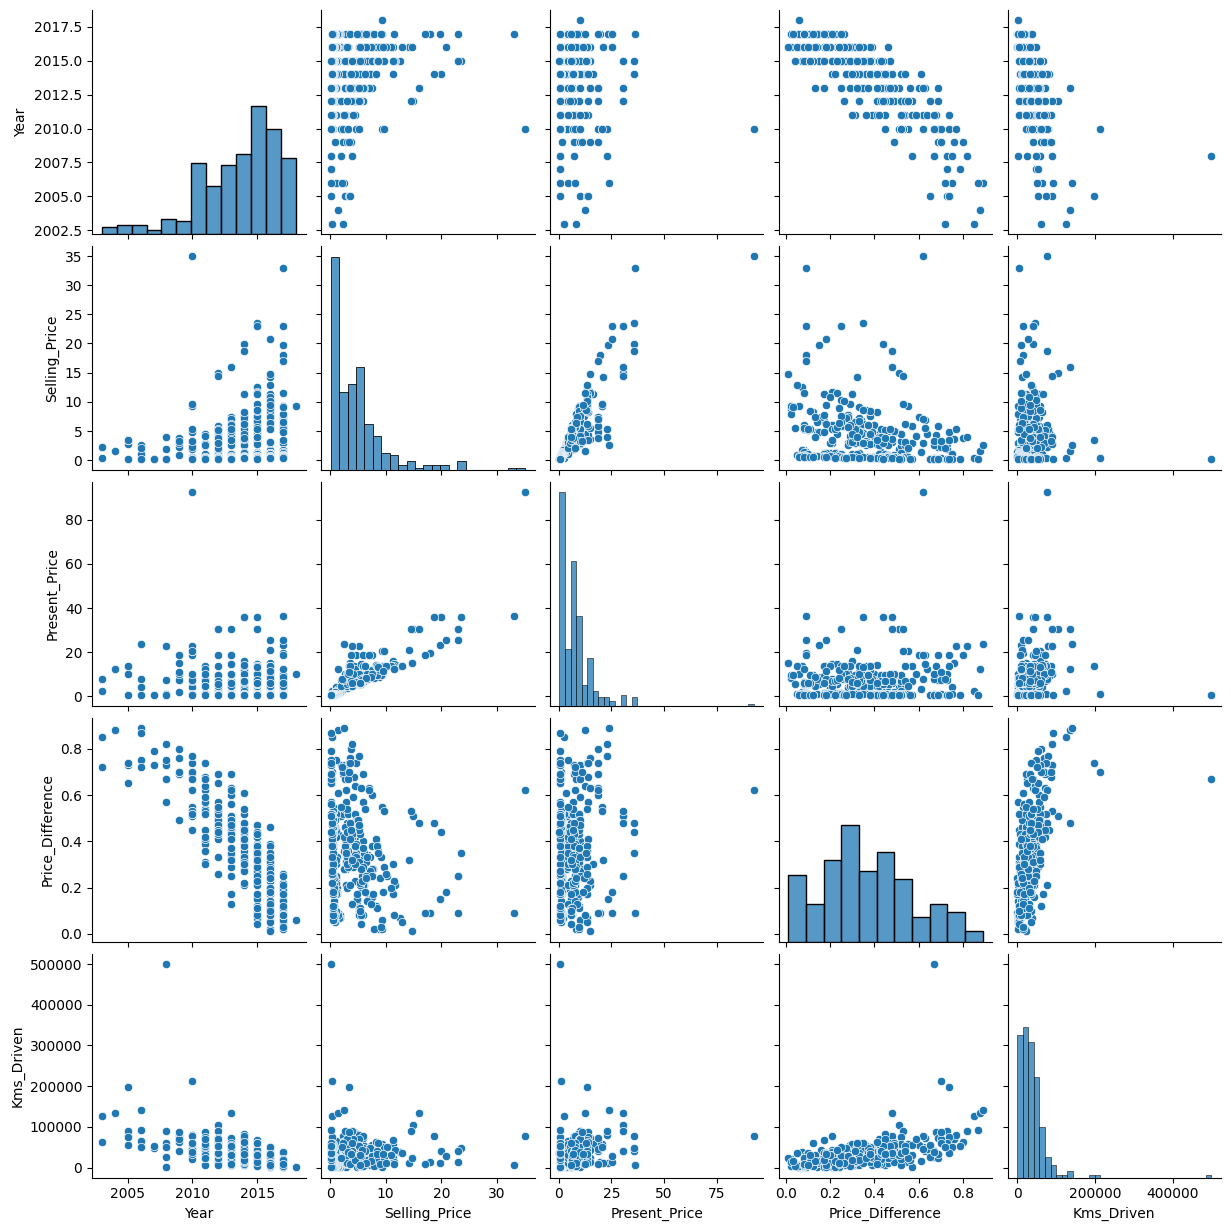

In [4]:
# a simple pair plot, can we see any correlation between the columns
# look for diagonally scattered data (in this case, compare prices 
# and the price difference). 
# diagonally from bottom left to top right = positive correlation
# diagonally from top left to bottom right = negative correlation
sns.pairplot(cars)

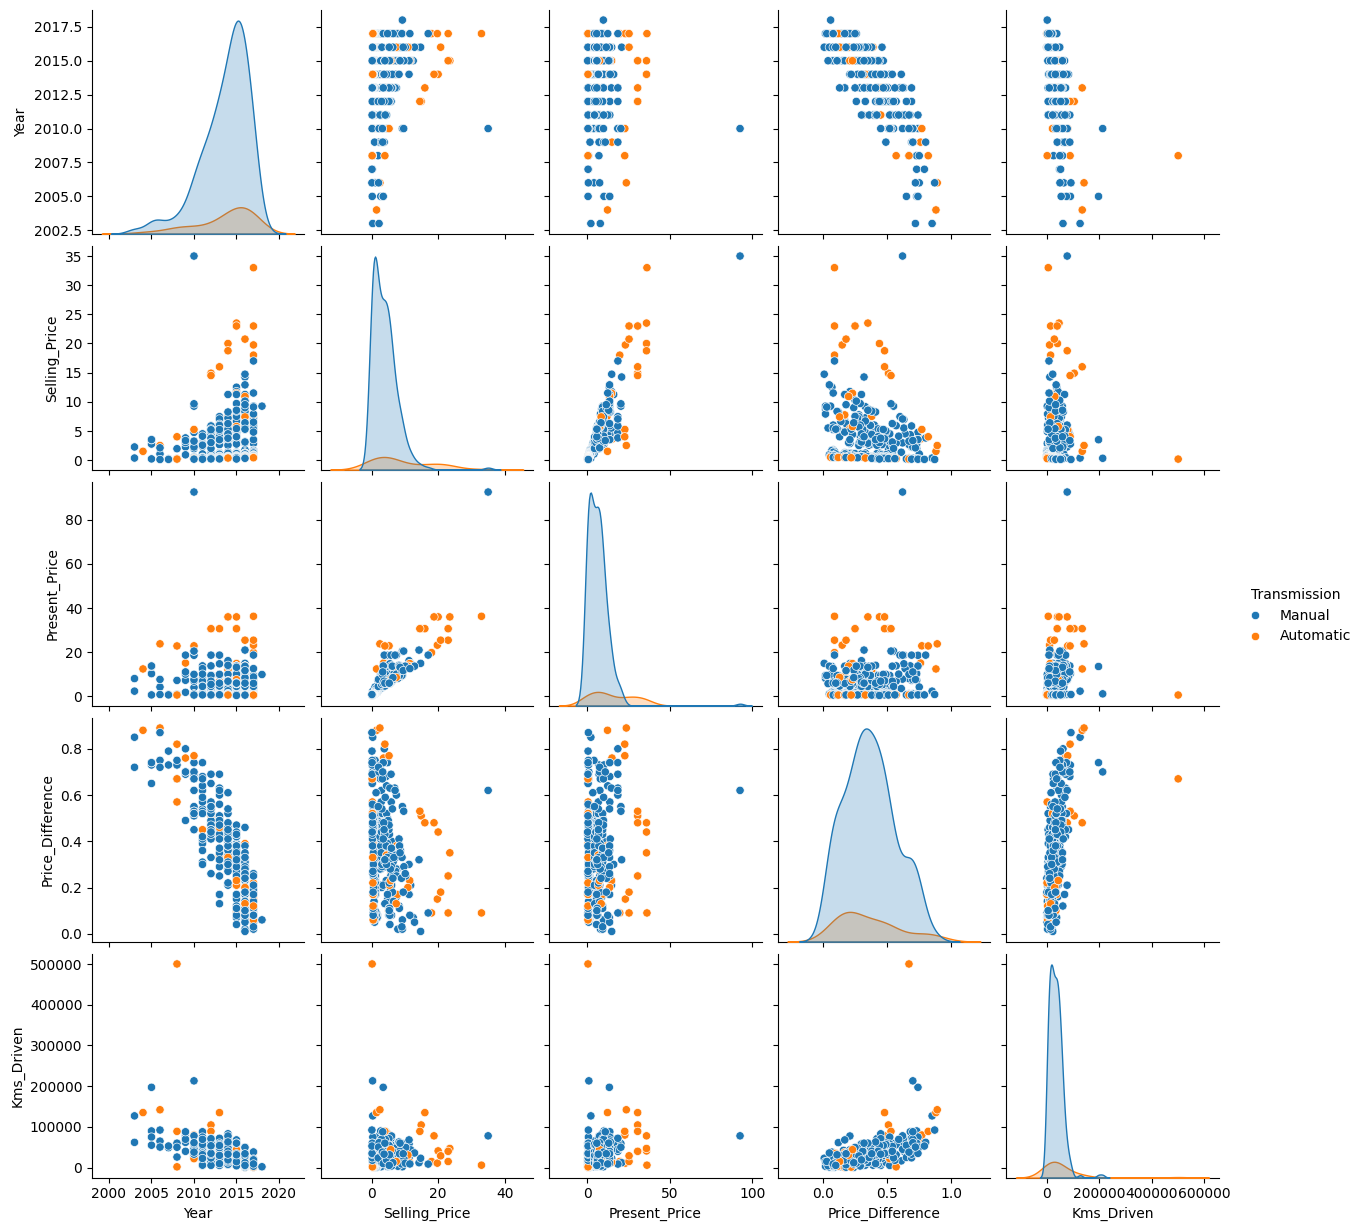

In [5]:
# Automatic transmission cars tend to be more expensive
sns.pairplot(cars, hue='Transmission')

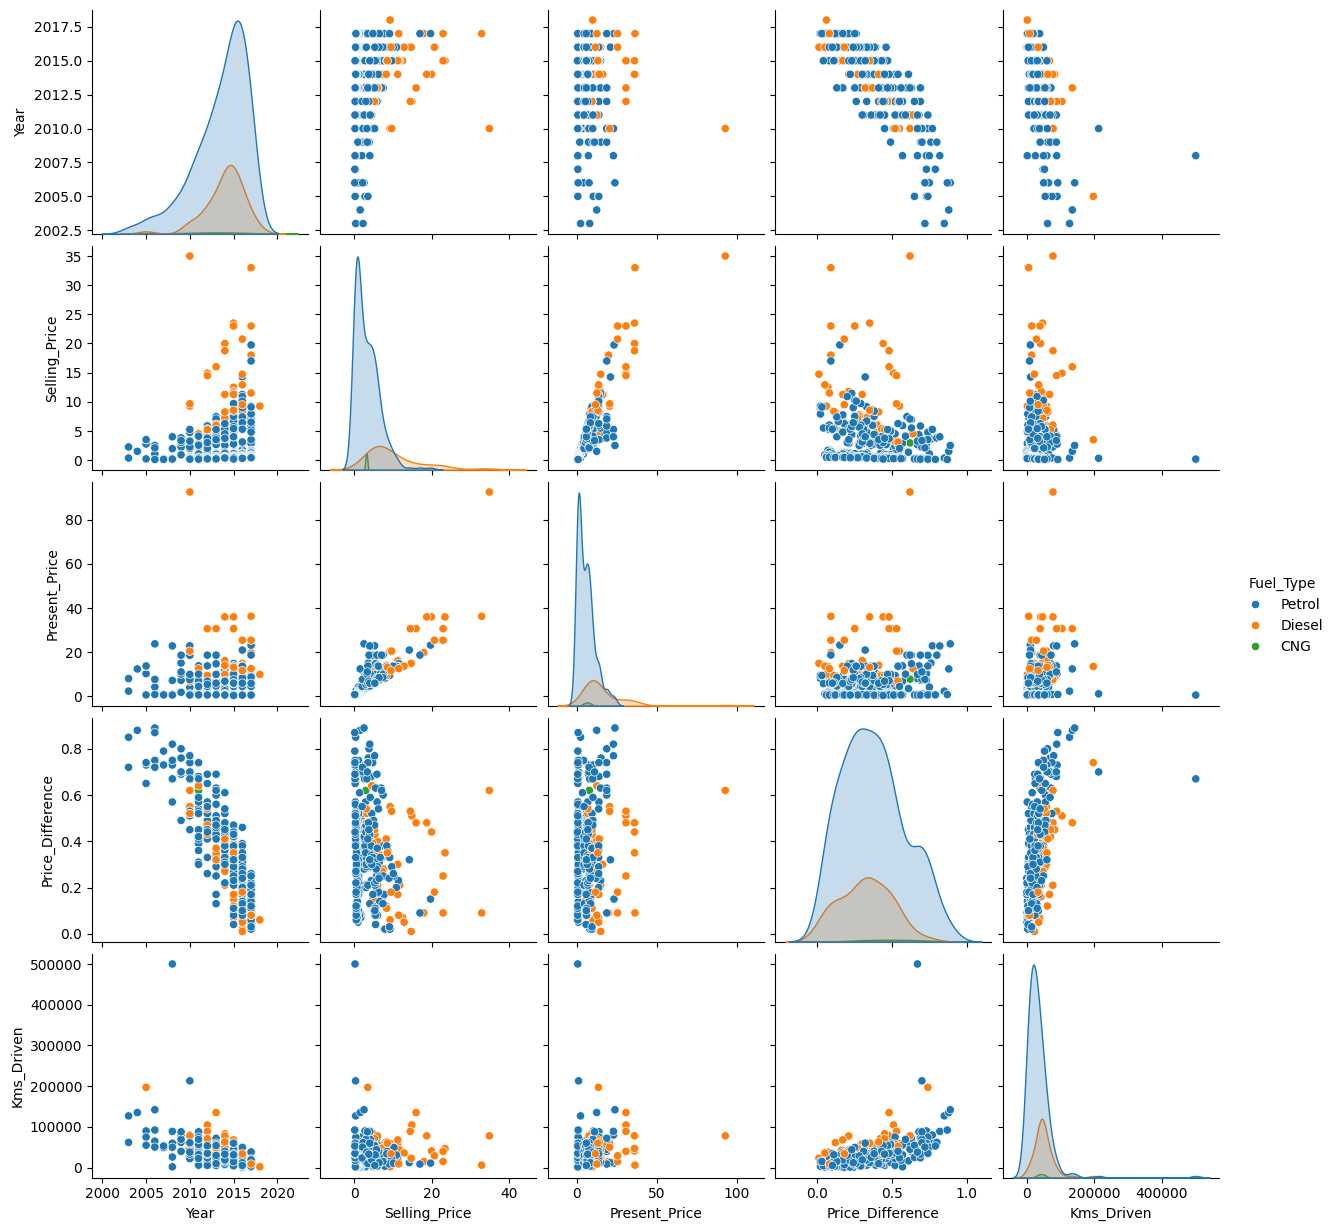

In [6]:
# Also Diesel fuel type seem to be more valuable in used cars
sns.pairplot(cars, hue='Fuel_Type')

<Axes: xlabel='Transmission', ylabel='Present_Price'>

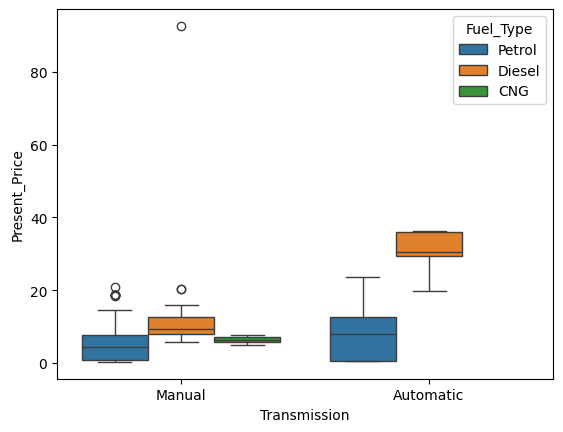

In [7]:
# Box plotting the combination => Transmission/Fuel Type and the price. 
sns.boxplot(x='Transmission', y='Present_Price', data=cars, hue='Fuel_Type')

At first it seems Diesel/Automatic cars are the most expensive ones in the
dataset, but unfortunately the amount of cars with this combination is only 12
cars, so more data is needed to make assumptions.

Individually inspecting, both the Automatic transmission and Diesel fuel type
will result in higher selling prices (it seems that price goes up if it’s either
Automatic or Diesel, or both.)

<h3><b>Results and summary:</b></h3>

It seems automatic and diesel vehicles are worth more in the used cars sales
department, however, the amount of data is not big enough for making this
conclusion. This same test should be done with a larger similar dataset. 

<h3><b>Ideas for further improvements:</b></h3>

This test should be tried out with a bigger dataset. It could be also interesting if
this same trend applies to Europe as well. (especially if the automatic cars are
as valuable in Europe as in US)